In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/onion-data/onion_12_24_clean.csv')

In [5]:
# Ensure Price Date is in datetime format
df["Price Date"] = pd.to_datetime(df["Price Date"])

# Ensure `Modal Price (Rs./Quintal)` is numeric
df["Modal Price (Rs./Quintal)"] = pd.to_numeric(df["Modal Price (Rs./Quintal)"], errors="coerce")

# Drop rows where `Modal Price (Rs./Quintal)` is NaN (result of coercing errors)
df = df.dropna(subset=["Modal Price (Rs./Quintal)"])

# Extract year and month
df["Year"] = df["Price Date"].dt.year
df["Month"] = df["Price Date"].dt.month_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638399 entries, 0 to 1638398
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   District Name              1638399 non-null  object        
 1   Commodity                  1638399 non-null  object        
 2   Min Price (Rs./Quintal)    1638399 non-null  float64       
 3   Max Price (Rs./Quintal)    1638399 non-null  float64       
 4   Modal Price (Rs./Quintal)  1638399 non-null  float64       
 5   Price Date                 1638399 non-null  datetime64[ns]
 6   Year                       1638399 non-null  int32         
 7   Month                      1638399 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 93.8+ MB


In [6]:
# sample year
df_2018 = df[df['Year'] == 2018]

# Reset the index for convenience
df_2018.reset_index(drop=True, inplace=True)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93840 entries, 0 to 93839
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District Name              93840 non-null  object        
 1   Commodity                  93840 non-null  object        
 2   Min Price (Rs./Quintal)    93840 non-null  float64       
 3   Max Price (Rs./Quintal)    93840 non-null  float64       
 4   Modal Price (Rs./Quintal)  93840 non-null  float64       
 5   Price Date                 93840 non-null  datetime64[ns]
 6   Year                       93840 non-null  int32         
 7   Month                      93840 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(3)
memory usage: 5.4+ MB


In [8]:
df_2018.head()

,District Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Year,Month
0,Fazilka,Onion,550.0,950.0,750.0,2018-04-13,2018,April
1,Fazilka,Onion,600.0,950.0,800.0,2018-05-22,2018,May
2,Fazilka,Onion,700.0,1250.0,1050.0,2018-09-13,2018,September
3,Fazilka,Onion,750.0,1100.0,900.0,2018-10-01,2018,October
4,Fazilka,Onion,750.0,1100.0,900.0,2018-09-26,2018,September


In [9]:
# Add a 'Price Category' column (Low, Mid, High)
def categorize_price(price):
    if price < 1000:
        return 'Low'
    elif 1000 <= price <= 3000:
        return 'Mid'
    else:
        return 'High'

df_2018['Price Category'] = df_2018['Modal Price (Rs./Quintal)'].apply(categorize_price)

# Convert categorical columns to numeric using one-hot encoding
df_2018 = pd.get_dummies(df_2018, columns=['District Name', 'Month', 'Commodity'])
# pd.get_dummies is a function in the pandas library that converts categorical data into a
# format suitable for machine learning models by creating one-hot encoded columns.

# Split into features (X) and target (y)
X = df_2018.drop(columns=['Price Category', 'Price Date', 'Modal Price (Rs./Quintal)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)'])
y = df_2018['Price Category']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
y.head()

0    Low
1    Low
2    Mid
3    Low
4    Low
Name: Price Category, dtype: object

In [23]:
X.head()

,Year,District Name_Agra,District Name_Ahmedabad,District Name_Ahmednagar,District Name_Aizawl,District Name_Ajmer,District Name_Akola,District Name_Alappuzha,District Name_Aligarh,District Name_Alipurduar,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Commodity_Onion
0,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [10]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))

KNN Accuracy: 84.77%


In [21]:
df_2018.head()

,District Name,Commodity,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,Year,Month
678512,Fazilka,Onion,550.0,950.0,750.0,2018-04-13,2018,April
678513,Fazilka,Onion,600.0,950.0,800.0,2018-05-22,2018,May
678514,Fazilka,Onion,700.0,1250.0,1050.0,2018-09-13,2018,September
678515,Fazilka,Onion,750.0,1100.0,900.0,2018-10-01,2018,October
678516,Fazilka,Onion,750.0,1100.0,900.0,2018-09-26,2018,September


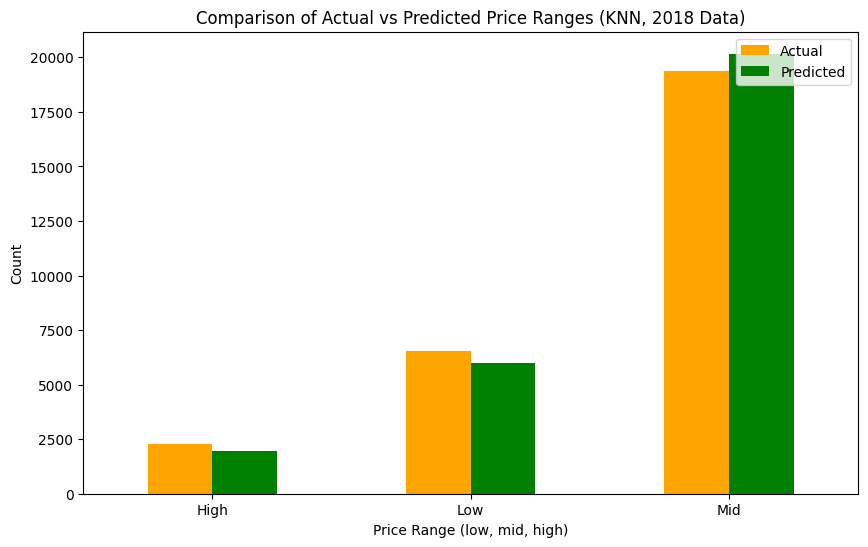

In [25]:
y_test_series = pd.Series(y_test, name="Actual")
y_pred_series = pd.Series(y_pred_knn, name="Predicted")

# Count the occurrences of each category in y_test and y_pred_knn
actual_counts = y_test_series.value_counts().sort_index()
predicted_counts = y_pred_series.value_counts().sort_index()

# Create a DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
}).fillna(0)  # Fill missing categories with 0 if necessary

# Plotting the grouped bar plot
comparison_df.plot(kind='bar', figsize=(10, 6), color=['orange', 'green'])

# Adding labels and title
plt.xlabel('Price Range (low, mid, high)')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Price Ranges (KNN, 2018 Data)')
plt.xticks(ticks=np.arange(len(comparison_df.index)), labels=comparison_df.index, rotation=0)
plt.legend(loc='upper right')
plt.savefig("actual_vs_pred_price_range.png", format="png", dpi=300)

# Display the plot
plt.show()

In [26]:
# LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Assuming you have your DataFrame 'df' with the 'Min Price (Rs./Quintal)' column

# Filter data for the year 2018
df_2018 = df[df['Year'] == 2018]

# Use the 'Min Price (Rs./Quintal)' as the target variable
prices = df_2018[['Min Price (Rs./Quintal)']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Prepare the data for LSTM model: Create sequences of 30 days for prediction
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Using 30 days to predict the next day's price
X, y = create_dataset(prices_scaled, time_step)

# Reshape X to be in the form (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [27]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer for prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred_lstm_scaled = model.predict(X_test)

# Inverse transform the predicted and actual prices back to original scale
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - loss: 0.0039
Epoch 2/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 62s 26ms/step - loss: 0.0028
Epoch 3/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 60s 26ms/step - loss: 0.0028
Epoch 4/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 61s 26ms/step - loss: 0.0027
Epoch 5/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 60s 26ms/step - loss: 0.0027
Epoch 6/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 61s 26ms/step - loss: 0.0027
Epoch 7/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 63s 27ms/step - loss: 0.0026
Epoch 8/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 61s 26ms/step - loss: 0.0026
Epoch 9/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 63s 27ms/step - loss: 0.0027
Epoch 10/10
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 63s 27ms/step - loss: 0.0026
587/587 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


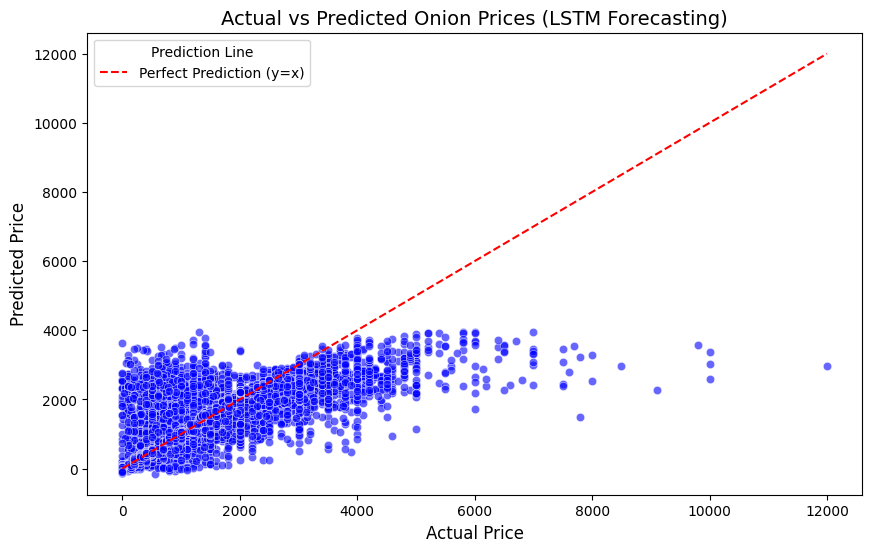

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test and y_pred_lstm are your actual and predicted values respectively
# Convert them into a pandas DataFrame for easy manipulation
df = pd.DataFrame({
    'Actual Price': y_test_actual.flatten(),   # Ensure these are 1D arrays or Series
    'Predicted Price': y_pred_lstm.flatten()
})

# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Actual Price'], y=df['Predicted Price'], color='blue', alpha=0.6)

# Adding a line for perfect predictions (y = x)
plt.plot([min(df['Actual Price']), max(df['Actual Price'])], 
         [min(df['Actual Price']), max(df['Actual Price'])], 
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

# Adding titles and labels
plt.title('Actual vs Predicted Onion Prices (LSTM Forecasting)', fontsize=14)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.legend(title='Prediction Line')
plt.savefig("actual_vs_pred_LSTM_forecasting.png", format="png", dpi=300)
plt.show()